# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os

import datetime

import pandas as pd
import polars as pl

# GLOBAL_VARS

In [2]:
CWD = os.getcwd()
PATH_INPUT_FOLDER = os.path.join(CWD, "input_urllib")

trip2401 = os.path.join(PATH_INPUT_FOLDER, "yellow_tripdata_2024-01.parquet")

In [3]:
pddf = pd.read_parquet(path = trip2401)
pldf = pl.read_parquet(source = trip2401)

In [4]:
pldf.shape

(2964624, 19)

In [5]:
pldf.head()

VendorID,TpepPickupDatetime,TpepDropoffDatetime,PassengerCount,TripDistance,RatecodeID,StoreAndFwdFlag,PULocationID,DOLocationID,PaymentType,FareAmount,Extra,MtaTax,TipAmount,TollsAmount,ImprovementSurcharge,TotalAmount,CongestionSurcharge,AirportFee
i64,datetime[ns],datetime[ns],f64,f64,f64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,"""N""",186,79,2,17.7,1.0,0.5,0.0,0.0,1.0,22.7,2.5,0.0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.8,1.0,"""N""",140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.7,1.0,"""N""",236,79,1,23.3,3.5,0.5,3.0,0.0,1.0,31.3,2.5,0.0
1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.4,1.0,"""N""",79,211,1,10.0,3.5,0.5,2.0,0.0,1.0,17.0,2.5,0.0
1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.8,1.0,"""N""",211,148,1,7.9,3.5,0.5,3.2,0.0,1.0,16.1,2.5,0.0


<Axes: xlabel='VendorID'>

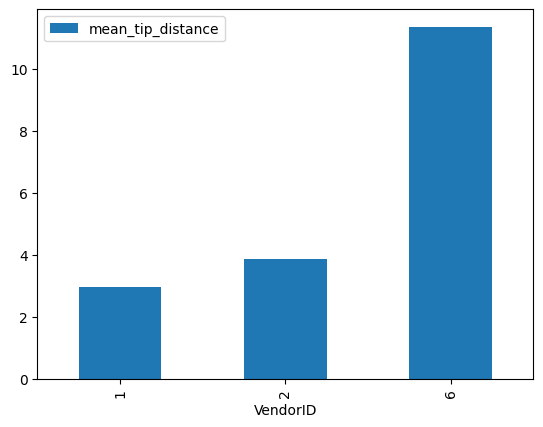

In [6]:
(
    pddf
    .groupby(by = ["VendorID"])
    .agg(
        max_passenger_count = ("PassengerCount", max),
        min_passenger_count = ("PassengerCount", min),
        mean_tip_distance = ("TripDistance", "mean")
    )
    .reset_index()
    .sort_values("VendorID")
    [["VendorID", "mean_tip_distance"]]
    .plot(kind = "bar", x = "VendorID")
)

In [7]:
(
    pldf
    .group_by(by = ["VendorID"])
    .agg(
        max_passenger_count = pl.col("PassengerCount").max(),
        min_passenger_count = pl.col("PassengerCount").min(),
        mean_tip_distance = pl.col("TripDistance").mean()
    )
    .sort("VendorID")
    .select(pl.col(["VendorID", "mean_tip_distance"]))
    .plot(kind = "bar", x = "VendorID")
)

:Bars   [VendorID]   (mean_tip_distance)

In [14]:
(
    pldf
    .with_columns(TpepPickupDatetimeStr = pl.col("TpepPickupDatetime").cast(pl.String))
    .with_columns(
        Year = pl.col("TpepPickupDatetime").dt.year(),
        Month = pl.col("TpepPickupDatetime").dt.month(),
        Day = pl.col("TpepPickupDatetime").dt.day()
    )
    .with_columns(Date = pl.date(pl.col("Year"), pl.col("Month"), pl.col("Day")))
    .group_by(pl.col("Date"))
    .agg(
        pl.col("PassengerCount").mean()
    )
    .filter(
        (pl.col("Date") >= datetime.datetime(2024, 1, 1)) & (pl.col("Date") < datetime.datetime(2024, 2, 1))
    )
    .sort(pl.col("Date"))
    .plot(kind = "line", x = "Date")
)

:Curve   [Date]   (PassengerCount)

In [23]:
(
    pldf
    .sort("TpepPickupDatetime")
    .group_by_dynamic(index_column = "TpepPickupDatetime", every = "7d", start_by = "monday")
    .agg(
        pl.col("PassengerCount").mean()
    )
    .filter(
        (pl.col("TpepPickupDatetime") >= datetime.datetime(2024, 1, 1)) &
        (pl.col("TpepPickupDatetime") < datetime.datetime(2024, 2, 1))
    )
    .plot(kind = "line", x = "TpepPickupDatetime")
    
)

:Curve   [TpepPickupDatetime]   (PassengerCount)

In [32]:
(
    pldf
    .filter(
        (pl.col("TpepPickupDatetime") >= datetime.datetime(2024, 1, 1)) &
        (pl.col("TpepPickupDatetime") < datetime.datetime(2024, 2, 1))
    )
    .with_columns(Day = pl.col("TpepPickupDatetime").dt.day())
    .with_columns(TotalFareAmount = pl.col("FareAmount").sum().over("Day"))
    .with_columns(PctPerDay = (pl.col("FareAmount")/pl.col("TotalFareAmount")).mul(100).round(5))
    .select(pl.col(["TpepPickupDatetime", "Day", "FareAmount", "TotalFareAmount", "PctPerDay"]))
    .plot(kind = "line", x = "TpepPickupDatetime", "")
)

TpepPickupDatetime,Day,FareAmount,TotalFareAmount,PctPerDay
datetime[ns],i8,f64,f64,f64
2024-01-01 00:57:55,1,17.7,1.7651e6,0.001
2024-01-01 00:03:00,1,10.0,1.7651e6,0.00057
2024-01-01 00:17:06,1,23.3,1.7651e6,0.00132
2024-01-01 00:36:38,1,10.0,1.7651e6,0.00057
2024-01-01 00:46:51,1,7.9,1.7651e6,0.00045
…,…,…,…,…
2024-01-31 23:45:59,31,15.77,1.7898e6,0.00088
2024-01-31 23:13:07,31,18.4,1.7898e6,0.00103
2024-01-31 23:19:00,31,19.97,1.7898e6,0.00112


In [48]:
(
    pldf
    .filter(
        (pl.col("TpepPickupDatetime") >= datetime.datetime(2024, 1, 1)) &
        (pl.col("TpepPickupDatetime") < datetime.datetime(2024, 2, 1))
    )
    .sort("TpepPickupDatetime")
    .select(pl.col(["TpepPickupDatetime", "PaymentType", "FareAmount"]))
    .group_by_dynamic(index_column = "TpepPickupDatetime", every = "1d", by = "PaymentType")
    .agg(pl.col("FareAmount").mean())
    .plot(kind = "line", y = "FareAmount", x = "TpepPickupDatetime", by = "PaymentType")
)

:NdOverlay   [PaymentType]
   :Curve   [TpepPickupDatetime]   (FareAmount)

In [51]:
(
    pldf
    .filter(
        (pl.col("TpepPickupDatetime") >= datetime.datetime(2024, 1, 1)) &
        (pl.col("TpepPickupDatetime") < datetime.datetime(2024, 2, 1))
    )
    .sort("TpepPickupDatetime")
    .select(pl.col(["TpepPickupDatetime", "PaymentType", "FareAmount"]))
    .group_by([pl.col("TpepPickupDatetime").dt.truncate("1d"), "PaymentType"])
    .agg(pl.col("FareAmount").mean())
    .sort("TpepPickupDatetime")
    .plot(kind = "line", y = "FareAmount", x = "TpepPickupDatetime", by = "PaymentType")
)

:NdOverlay   [PaymentType]
   :Curve   [TpepPickupDatetime]   (FareAmount)

In [57]:
(
    pldf
    .filter(
        (pl.col("TpepPickupDatetime") >= datetime.datetime(2024, 1, 1)) &
        (pl.col("TpepPickupDatetime") < datetime.datetime(2024, 2, 1))
    )
    .sort("TpepPickupDatetime")
    .select(pl.col(["TpepPickupDatetime", "PaymentType", "FareAmount"]))
    .filter(~pl.all_horizontal(pl.all().is_null()))
)

TpepPickupDatetime,PaymentType,FareAmount
datetime[ns],i64,f64
2024-01-01 00:00:00,1,4.4
2024-01-01 00:00:02,1,8.6
2024-01-01 00:00:03,2,5.1
2024-01-01 00:00:04,2,33.8
2024-01-01 00:00:05,1,70.0
…,…,…
2024-01-31 23:59:50,1,7.2
2024-01-31 23:59:51,1,70.0
2024-01-31 23:59:54,3,29.6


In [59]:
[m for m in dir(pl.DataFrame) if not m.startswith("_")]

['apply',
 'approx_n_unique',
 'bottom_k',
 'cast',
 'clear',
 'clone',
 'columns',
 'corr',
 'count',
 'describe',
 'drop',
 'drop_in_place',
 'drop_nulls',
 'dtypes',
 'equals',
 'estimated_size',
 'explode',
 'extend',
 'fill_nan',
 'fill_null',
 'filter',
 'find_idx_by_name',
 'flags',
 'fold',
 'frame_equal',
 'gather_every',
 'get_column',
 'get_column_index',
 'get_columns',
 'glimpse',
 'group_by',
 'group_by_dynamic',
 'group_by_rolling',
 'groupby',
 'groupby_dynamic',
 'groupby_rolling',
 'hash_rows',
 'head',
 'height',
 'hstack',
 'insert_at_idx',
 'insert_column',
 'interpolate',
 'is_duplicated',
 'is_empty',
 'is_unique',
 'item',
 'iter_columns',
 'iter_rows',
 'iter_slices',
 'join',
 'join_asof',
 'lazy',
 'limit',
 'map_rows',
 'max',
 'max_horizontal',
 'mean',
 'mean_horizontal',
 'median',
 'melt',
 'merge_sorted',
 'min',
 'min_horizontal',
 'n_chunks',
 'n_unique',
 'null_count',
 'partition_by',
 'pipe',
 'pivot',
 'plot',
 'product',
 'quantile',
 'rechunk',


In [83]:
r = (
    pldf
    .filter(
        (pl.col("TpepPickupDatetime") >= datetime.datetime(2024, 1, 1)) &
        (pl.col("TpepPickupDatetime") < datetime.datetime(2024, 2, 1))
    )
    .sort("TpepPickupDatetime")
    .select(pl.col(["TpepPickupDatetime", "PaymentType", "FareAmount"]))
    # .group_by([pl.col("TpepPickupDatetime").dt.truncate("1d"), "PaymentType"])
    .group_by(pl.col("TpepPickupDatetime").dt.truncate("1d"))
    .agg(
        TotalFareAmount = pl.col("FareAmount").sum()
    )
    .with_columns(
        MovingAverageTotalAmount =\
        pl.col("TotalFareAmount").mean().rolling(index_column = "TpepPickupDatetime", period = "7d")
    )

)

In [88]:
pl.Config.set_fmt_float("full")

polars.config.Config

In [91]:
(1765112.95 + 1583412.42)/2

1674262.685

In [93]:
(
    r
    .head(7)
    .with_columns(pl.col("TotalFareAmount").sum()/7)
)

TpepPickupDatetime,TotalFareAmount,MovingAverageTotalAmount
datetime[ns],f64,f64
2024-01-01 00:00:00,1671416.3042857142,1765112.95
2024-01-02 00:00:00,1671416.3042857142,1674262.685
2024-01-03 00:00:00,1671416.3042857142,1656457.2533333332
2024-01-04 00:00:00,1671416.3042857142,1716235.835
2024-01-05 00:00:00,1671416.3042857142,1740972.0699999998
2024-01-06 00:00:00,1671416.3042857142,1731000.2666666666
2024-01-07 00:00:00,1671416.3042857142,1671416.3042857142


In [97]:
r = (
    pldf
    .filter(
        (pl.col("TpepPickupDatetime") >= datetime.datetime(2024, 1, 1)) &
        (pl.col("TpepPickupDatetime") < datetime.datetime(2024, 2, 1))
    )
    .sort("TpepPickupDatetime")
    .select(pl.col(["TpepPickupDatetime", "PaymentType", "FareAmount"]))
    .group_by([pl.col("TpepPickupDatetime").dt.truncate("1d"), "PaymentType"])
    .agg(
        TotalFareAmount = pl.col("FareAmount").sum()
    )
)

r

TpepPickupDatetime,PaymentType,TotalFareAmount
datetime[ns],i64,f64
2024-01-07 00:00:00,4,2158.8400000000006
2024-01-05 00:00:00,3,4422.829999999997
2024-01-29 00:00:00,0,50811.340000000004
2024-01-16 00:00:00,4,1478.0100000000004
2024-01-16 00:00:00,0,112149.15000000074
…,…,…
2024-01-16 00:00:00,3,3239.1799999999994
2024-01-13 00:00:00,0,93556.79000000062
2024-01-24 00:00:00,3,3316.8900000000017


In [119]:
(254140.7699999907 + 48010.80000000012)/2

151075.7849999954

In [123]:
(
    r
    .sort(["TpepPickupDatetime", "PaymentType"])
    .rolling(
        index_column = "TpepPickupDatetime",
        group_by = "PaymentType",
        period = "7d"
        
    )
    .agg(
        MA7DTotalFareAmount = pl.col("TotalFareAmount").mean()
    )
    .join(r, on = ["PaymentType", "TpepPickupDatetime"])
    .sort(["PaymentType", "TpepPickupDatetime"])
)

PaymentType,TpepPickupDatetime,MA7DTotalFareAmount,TotalFareAmount
i64,datetime[ns],f64,f64
0,2024-01-01 00:00:00,254140.7699999907,254140.7699999907
0,2024-01-02 00:00:00,151075.7849999954,48010.80000000012
0,2024-01-03 00:00:00,115185.27666666365,43404.26000000014
0,2024-01-04 00:00:00,100484.1674999978,56380.840000000266
0,2024-01-05 00:00:00,93170.36599999828,63915.1600000002
…,…,…,…
4,2024-01-27 00:00:00,2150.964285714286,2551.0100000000016
4,2024-01-28 00:00:00,2154.651428571429,2114.3100000000013
4,2024-01-29 00:00:00,2181.388571428572,1871.7299999999996
